In [3]:

import numpy as np # linear algebra
import pandas as pd # data processing

In [4]:
# sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [34]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation

In [17]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

import os

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
def img_to_array(path, category_no, X, y):

  for p in os.listdir(path):
        img = cv2.imread(os.path.join(path, p), cv2.IMREAD_GRAYSCALE)
        img_np = cv2.resize(img, dsize = (150, 150))
        X.append(img_np)
        y.append(category_no)

In [13]:
path_train="/content/drive/MyDrive/NIH_dataset_clean/NIH_dataset_clean/train/"


category_list = ["Normal", "Pneumonia", "Other"]

X_train = []
y_train = []

for i in range(len(category_list)):
    img_to_array(path_train + category_list[i], i, X_train, y_train)
    
X_train = np.array(X_train).reshape(-1,150,150,1)
y_train = np.array(y_train)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


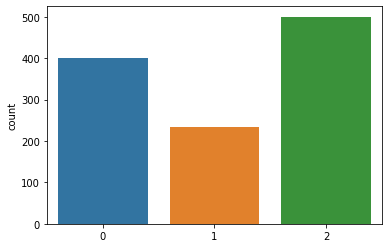

In [18]:
sns.countplot(y_train)

In [19]:
path_test = "/content/drive/MyDrive/NIH_dataset_clean/NIH_dataset_clean/test/"


X_test = []
y_test = []

for i in range(len(category_list)):
    img_to_array(path_test + category_list[i], i, X_test, y_test)
    
X_test = np.array(X_test).reshape(-1,150,150,1)
y_test = np.array(y_test)

In [33]:
X_train = tf.keras.utils.normalize(X_train, axis=1)  # scales data between 0 and 1
X_test = tf.keras.utils.normalize(X_test, axis=1)  # scales data between 0 and 1

model = tf.keras.models.Sequential()  # a basic feed-forward model
model.add(tf.keras.layers.Flatten())  # takes our 28x28 and makes it 1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # a simple fully-connected layer, 128 units, relu activation
model.add(tf.keras.layers.Dense(3, activation=tf.nn.softmax))  # our output layer. 10 units for 3 classes. Softmax for probability distribution

model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(X_train, y_train, epochs=20)  # train the model

val_loss, val_acc = model.evaluate(X_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print("Accuracy: %.2f" % (val_acc*100))  # model's accuracy

Epoch 1/20
36/36 [==============================] - 1s 13ms/step - loss: 1.1578 - accuracy: 0.4021
Epoch 2/20
36/36 [==============================] - 0s 13ms/step - loss: 1.0899 - accuracy: 0.4347
Epoch 3/20
36/36 [==============================] - 0s 13ms/step - loss: 1.0561 - accuracy: 0.4568
Epoch 4/20
36/36 [==============================] - 0s 13ms/step - loss: 1.0397 - accuracy: 0.4850
Epoch 5/20
36/36 [==============================] - 0s 13ms/step - loss: 1.0526 - accuracy: 0.4444
Epoch 6/20
36/36 [==============================] - 0s 13ms/step - loss: 1.0423 - accuracy: 0.4594
Epoch 7/20
36/36 [==============================] - 0s 13ms/step - loss: 1.0641 - accuracy: 0.4109
Epoch 8/20
36/36 [==============================] - 0s 13ms/step - loss: 1.0380 - accuracy: 0.4577
Epoch 9/20
36/36 [==============================] - 0s 13ms/step - loss: 1.0272 - accuracy: 0.4700
Epoch 10/20
36/36 [==============================] - 0s 14ms/step - loss: 1.0265 - accuracy: 0.4771
Epoch 11/